<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_Air_Quality_Index_(AQI)_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')
Dataset shape: (435742, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     435739 non-null  object        
 4   agency                       286261 non-null  object        
 5   type                         430349 non-null  object        
 6   so2                          401096 non-null  float64       
 7   no2                          419509 non-null  float64       
 8   rspm   

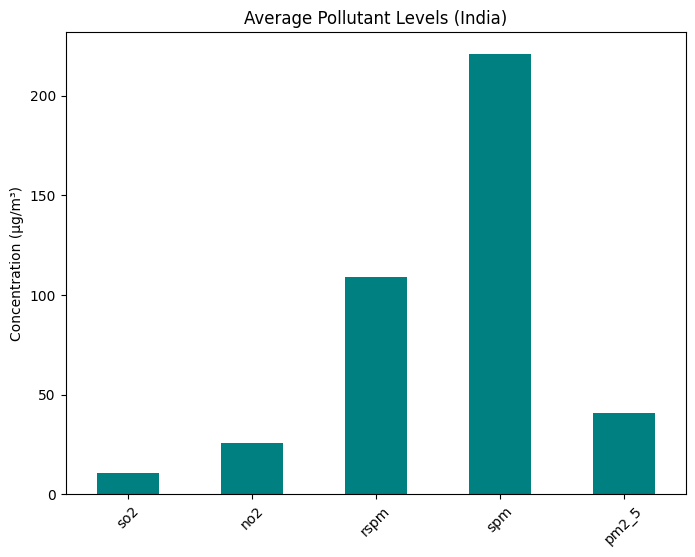

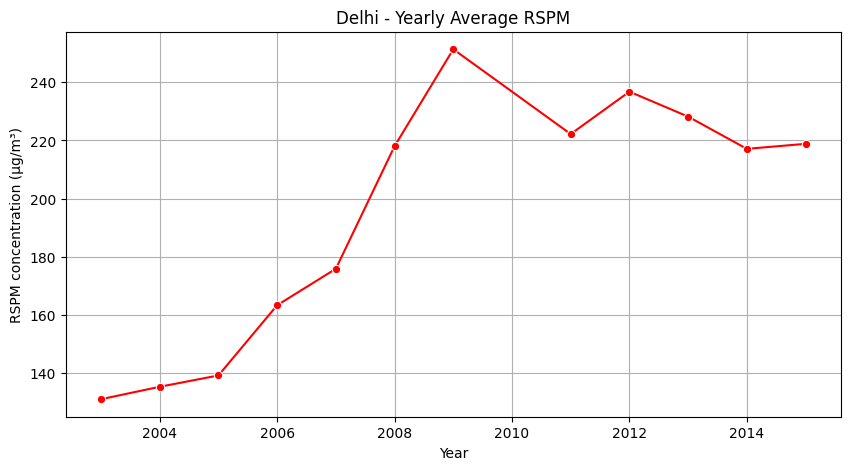

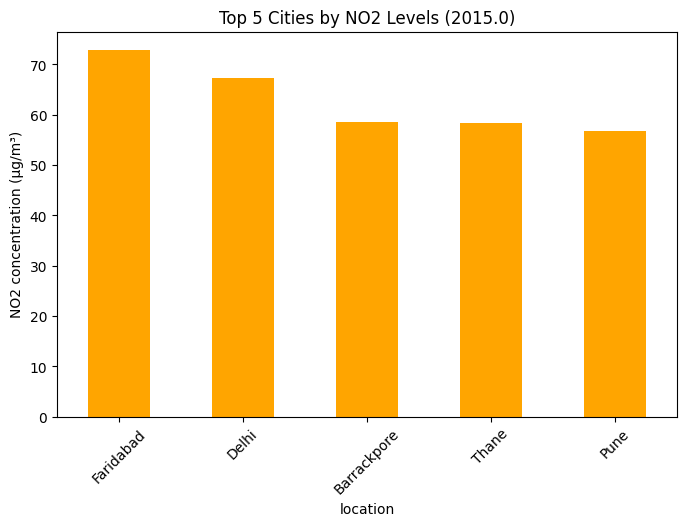

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with encoding
aqi_df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1', low_memory=False)

# Clean column names
aqi_df.columns = aqi_df.columns.str.strip().str.lower()

# Check columns
print(aqi_df.columns)

# Convert 'date' column to datetime format
aqi_df['date'] = pd.to_datetime(aqi_df['date'], errors='coerce')

# Extract Year from date
aqi_df['year'] = aqi_df['date'].dt.year

# Basic Info
print("Dataset shape:", aqi_df.shape)
print(aqi_df.info())

# Null value check
print("\nMissing values in dataset:\n", aqi_df.isnull().sum())

# Average pollutant levels
pollutants = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
avg_pollutants = aqi_df[pollutants].mean()
print("\nAverage pollutant levels (India):\n", avg_pollutants)

# Plot pollutant levels
plt.figure(figsize=(8,6))
avg_pollutants.plot(kind='bar', color='teal')
plt.title('Average Pollutant Levels (India)')
plt.ylabel('Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.show()

# Delhi Specific Analysis
delhi_df = aqi_df[aqi_df['state'] == 'Delhi']

# Yearly average RSPM in Delhi
delhi_yearly_rspm = delhi_df.groupby('year')['rspm'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=delhi_yearly_rspm.index, y=delhi_yearly_rspm.values, marker='o', color='red')
plt.title('Delhi - Yearly Average RSPM')
plt.xlabel('Year')
plt.ylabel('RSPM concentration (µg/m³)')
plt.grid()
plt.show()

# Top 5 polluted cities by NO2
latest_year = aqi_df['year'].max()
latest_df = aqi_df[aqi_df['year'] == latest_year]
city_no2 = latest_df.groupby('location')['no2'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
city_no2.plot(kind='bar', color='orange')
plt.title(f'Top 5 Cities by NO2 Levels ({latest_year})')
plt.ylabel('NO2 concentration (µg/m³)')
plt.xticks(rotation=45)
plt.show()